## 1. Introduction

#### 1.1 Background Information

According to Deloitte Digital (2015), digital interactions are expected to influence 64 cents
of every dollar spent in retail stores by the end of 2015, meaning that social media is increasing its direct impact on companies' revenues. Combined that with the acceleration of social media use in the pandemic, it's key for companies to understand what will engage consumers the most. 

Therefore, we will compare average Lifetime Post Total Consumptions/Lifetime Post Total Impressions ratio between different types of content (Status, Photo, Link, Video) and find out if there is a statistical difference between them. The idea being we want to see how effective each type of content is when converting looks into engagement.

#### 1.2 Dataset Description

// TODO: add brief description of dataset and explain what the variables of interest represent

## 2. Preliminary Results

#### 2.1 Reading the Data

In [111]:
# Load the required libraries
library(tidyverse)

# Here we read the data set straight from the web
# The original source is linked here (https://archive.ics.uci.edu/ml/datasets/Facebook+metrics)
temp <- tempfile()
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00368/Facebook_metrics.zip",temp)
data <- read_delim(unz(temp, "dataset_Facebook.csv"), delim=";")
unlink(temp)

Rows: 500 Columns: 19

── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (1): Type
dbl (18): Page total likes, Category, Post Month, Post Weekday, Post Hour, P...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



#### 2.2 Cleaning the Data

In [93]:
# First remove spaces from the column names
names(data)<-make.names(names(data),unique = TRUE)

# Select only the variables of interest
data_selected = data %>%
    select(Type, Lifetime.Post.Total.Impressions, Lifetime.Post.Consumptions) %>%
    filter(!is.na(Type))

# Assign new more manageable column names
names(data_selected) <- c("Type", "LifetimeImpressions", "LifetimeConsumptions")

# Preview the clean dataset
head(data_selected)

Type,LifetimeImpressions,LifetimeConsumptions
<chr>,<dbl>,<dbl>
Photo,5091,159
Status,19057,1674
Photo,4373,154
Photo,87991,1119
Photo,13594,580
Status,20849,1389


#### 2.3 Data Summary

In [114]:
# Here we will provide a summary of the dataset
data_summary <- data_selected %>%
    group_by(Type) %>%
    summarise(MeanImpressions = mean(LifetimeImpressions), MeanConsumptions = mean(LifetimeConsumptions), Num = sum(Type == Type)) %>%
    mutate(ratio=MeanConsumptions/MeanImpressions)
data_summary

data_summary_longer <- data_summary %>%
    select(Type, MeanImpressions, MeanConsumptions) %>%
    pivot_longer(cols=c('MeanImpressions', 'MeanConsumptions'), names_to='variable', values_to='value')

data_summary_longer

Type,MeanImpressions,MeanConsumptions,Num,ratio
<chr>,<dbl>,<dbl>,<int>,<dbl>
Link,28725.45,374.0909,22,0.01302298
Photo,28994.50,1299.0258,426,0.04480249
Status,24244.47,2838.8667,45,0.11709338
Video,102622.43,2600.1429,7,0.02533698


Type,variable,value
<chr>,<chr>,<dbl>
Link,MeanImpressions,28725.4545
Link,MeanConsumptions,374.0909
Photo,MeanImpressions,28994.4977
Photo,MeanConsumptions,1299.0258
Status,MeanImpressions,24244.4667
Status,MeanConsumptions,2838.8667
Video,MeanImpressions,102622.4286
Video,MeanConsumptions,2600.1429


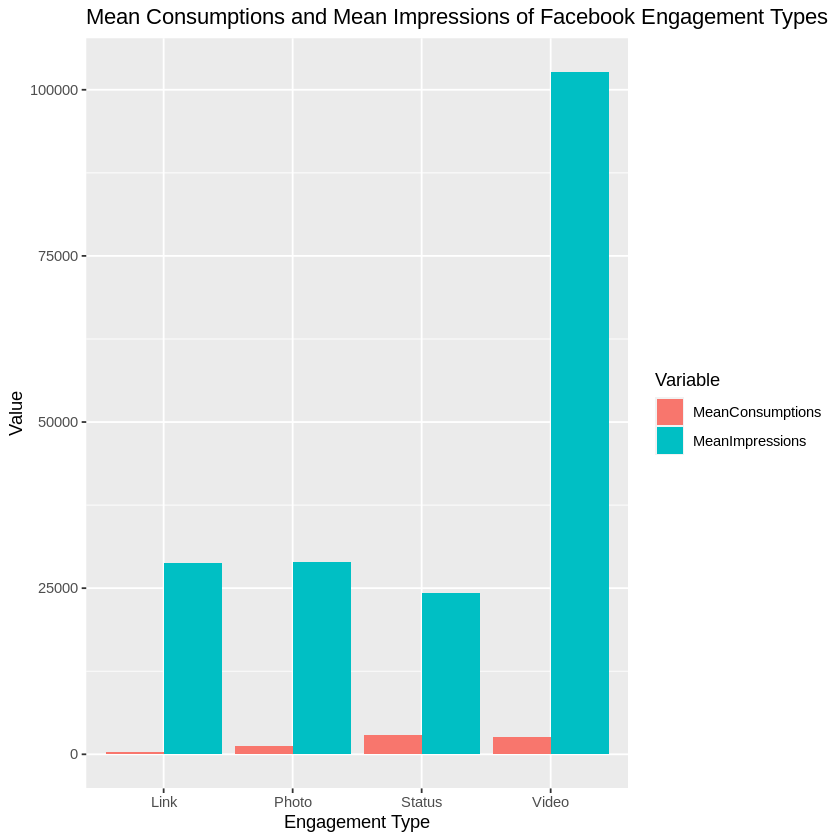

In [118]:
data_summary_plot <- data_summary_longer %>%
    ggplot(aes(x=Type, y=value, fill=variable)) +
    geom_bar(stat='identity', position='dodge') +
    labs(x = "Engagement Type", y = "Value", fill = "Variable") +
    ggtitle("Mean Consumptions and Mean Impressions of Facebook Engagement Types")
data_summary_plot

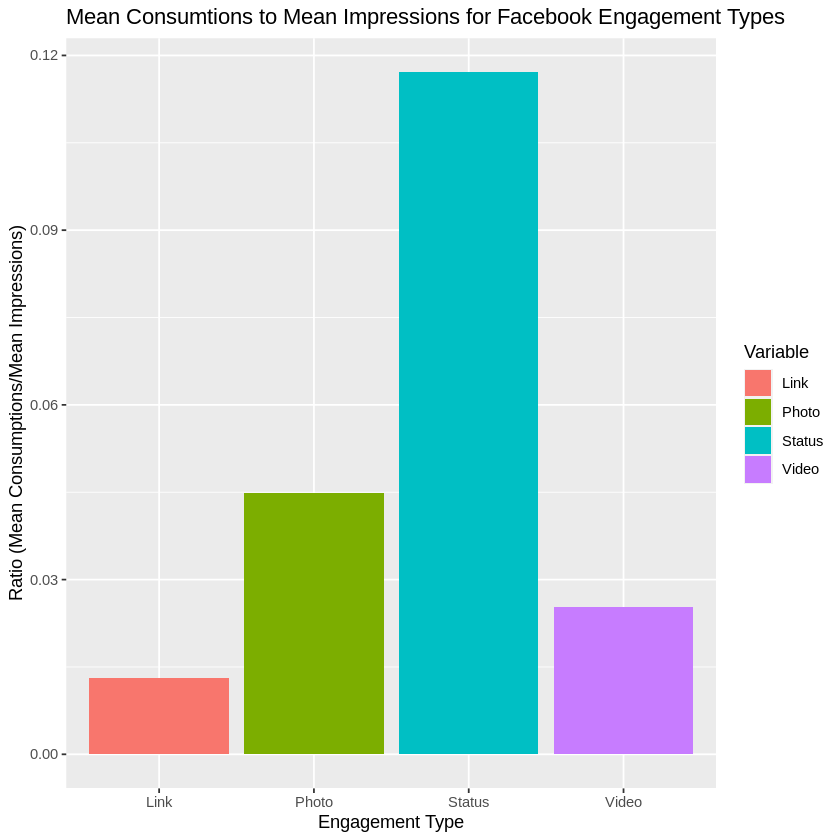

In [121]:
data_ratio_plot <- data_summary %>%
    ggplot(aes(x=Type, y=ratio, fill=Type)) +
    geom_bar(stat='identity', position='dodge') + 
    labs(x = "Engagement Type", y = "Ratio (Mean Consumptions/Mean Impressions)", fill = "Variable") +
    ggtitle("Mean Consumtions to Mean Impressions for Facebook Engagement Types")
data_ratio_plot

## 3. Methods

   Our group plan to analyze the ratios of the averages of Lifetime Post Total Consumptions/Lifetime Post Total Impressions between the following types of content, including Status, Photo, Link and Video. Evaluating the impact of advertisement in social media is a critical problem in commercial strategy, the ratio that we are concerned with is exactly related to it (Moro et al., 2016). We plan to use the method of bootstrapping to get the sample’s average since we cannot get the population parameter. The above histograms represent these four significant factors that can contribute to influencing the ratio of the two variables that we are concerned about. To make our report trustworthy, we also going to construct and visualize the confidence intervals to determine if they will capture the true values. However, the plots and estimates are not enough to give to a stakeholder, hypothesis testing is going to be used to address this gap, which can assess the plausibility of a hypothesis by using sample data, making our statistical inference more reliable and accurate.

   Using the methods above, the graphs of each of the variables can give us information about the four averages of Lifetime Post Total Consumptions/Lifetime Post Total Impressions ratio. Comparing them can help understand their relationships between the content types (Status, Photo, Link, Video) and this ratio, which can provide useful and valuable information when the companies advertise their products on social media. They may determine which types of content should be posted based on the results of our research. Our research can lead to a future question which is if our results will be influenced by different types of products, such as clothes, food, education, and so on.

## 4. References

1. Moro, S., Rita, P., & Vala, B. (2016). Predicting social media performance metrics and evaluation of the impact on brand building: A data mining approach. Journal of Business Research, 69(9), 3341-3351. https://doi.org/10.1016/j.jbusres.2016.02.010 
